<a href="https://colab.research.google.com/github/DanieGS/Coursework-and-Assignments-Repository/blob/main/Tesla_GME_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

##Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [ ]:
##1
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


##Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [ ]:
#CDGS
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Limpieza de datos
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


##Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [ ]:
#3
#CDGS

# Extraer los datos de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")


gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


##Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [ ]:
#4 webscaping
#CDGS

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
    gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]


print(gme_revenue.tail())


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


##Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

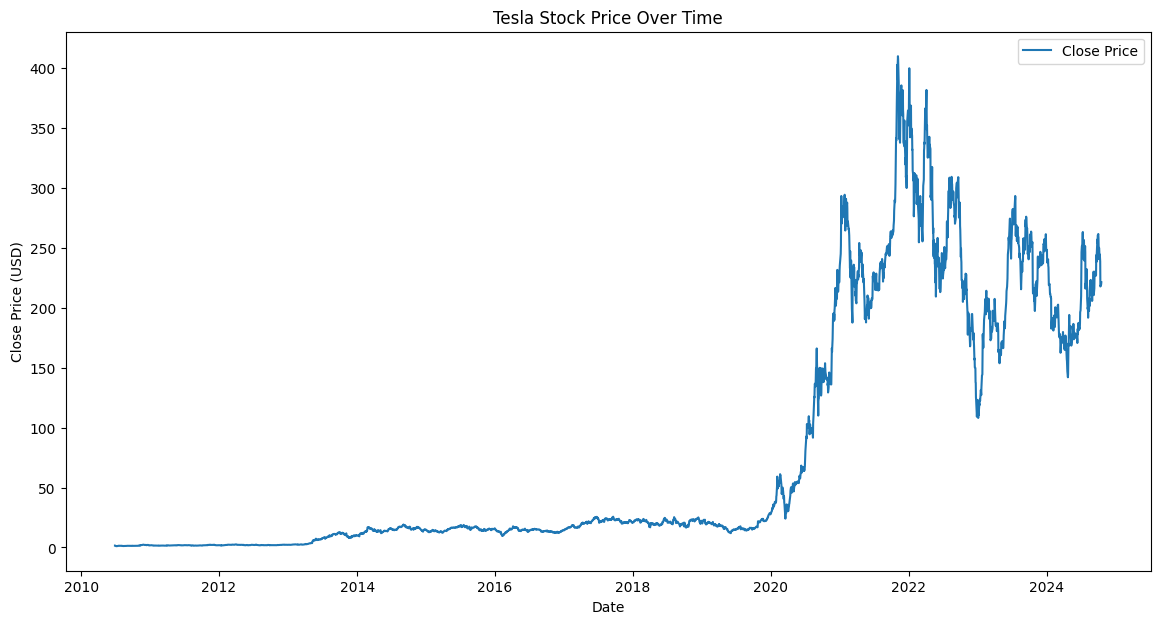

In [ ]:
#CDGS
#Plot Tesla Stock Graph

import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.title(title)
    plt.legend()
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price Over Time')


##Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

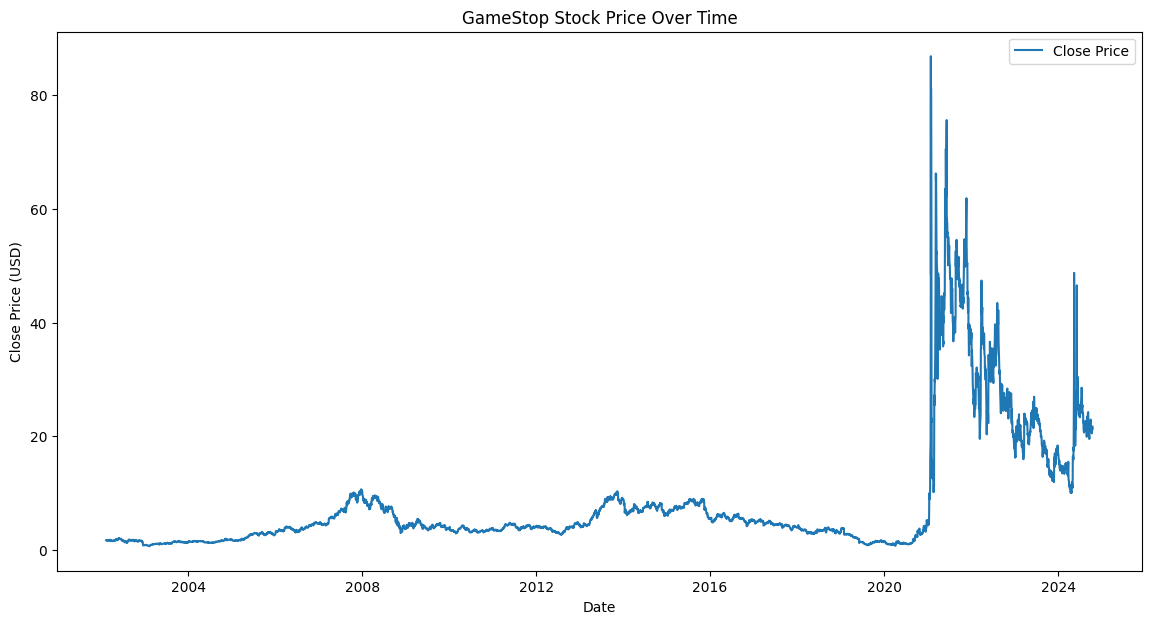

In [ ]:
#llamar a la función definida
make_graph(gme_data, 'GameStop Stock Price Over Time')
